In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from nda.optimizers import DANE, ADMM
from nda.experiment_utils import run_exp
from nda.problems import LinearRegression, LogisticRegression

from optimizers import BFGS, CEDANE

In [3]:
def plot(results, kappa, max_comm=None):
    from nda.experiment_utils.utils import LINE_STYLES
    legends = []
    plt.figure()
    for (name, data), style in zip(results, LINE_STYLES()):
        if 'comm_rounds' in data.columns:
            legends.append(name)
            mask = data.comm_rounds <= max_comm
            plt.semilogy(data.loc[mask].comm_rounds, data.loc[mask].f / p.f_min - 1, style)

    plt.ylabel("Relative optimality gap")
    plt.xlabel('Communications')
    plt.title(r"$\kappa$ = " + str(int(kappa)))
    plt.legend(legends)

# Linear Regression with synthetic dataset

## Kappa = 10

In [4]:
n_agent = 20
m = 80
dim = 200

kappa = 10
n_iters = 100

p = LinearRegression(n_agent=n_agent, m=m, dim=dim, noise_variance=1, kappa=kappa, graph_type='er', graph_params=0.3)

x_0 = np.random.rand(dim, n_agent).mean(axis=1)

exps = [
    ADMM(p, n_iters=2*n_iters, rho=1.2, x_0=x_0),
    BFGS(p, n_iters=2*n_iters, mu=1.1, x_0=x_0),
    DANE(p, n_iters=n_iters, mu=6E-2, x_0=x_0),
    CEDANE(p, n_iters=n_iters, mu=12E-2, x_0=x_0)
    ]

res = run_exp(exps, kappa=kappa, max_iter=n_iters, n_gpus=1, processes_per_gpu=4, save=False, plot=False)

INFO 19:24:00.9773 5691 linear_regression.py:31] Initializing using GPU
INFO 19:24:01.9943 5811 linear_regression.py:63] f_min = 0.44141149623642684
INFO 19:24:02.9605 5691 linear_regression.py:46] beta = 0.3138
INFO 19:24:02.9626 5691 linear_regression.py:48] Initialization done
INFO 19:24:02.9750 5851 utils.py:21] ADMM started
INFO 19:24:02.9827 5854 utils.py:21] BFGS started
INFO 19:24:02.9900 5857 utils.py:21] DANE started
INFO 19:24:02.9977 5860 utils.py:21] CEDANE started
INFO 19:24:04.6118 5854 optimizer.py:201] Gradient norm converged
INFO 19:24:04.6151 5854 utils.py:40] BFGS done, total 1.63s
INFO 19:24:19.6420 5860 optimizer.py:201] Gradient norm converged
INFO 19:24:19.6456 5860 utils.py:40] CEDANE done, total 16.65s
INFO 19:24:19.9264 5857 optimizer.py:201] Gradient norm converged
INFO 19:24:19.9311 5857 utils.py:40] DANE done, total 16.94s
INFO 19:24:22.2110 5851 utils.py:40] ADMM done, total 19.24s


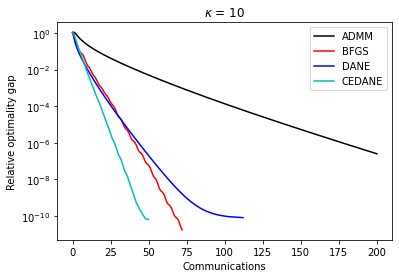

In [5]:
plot(
    res,
    kappa,
    max_comm=200
)

## Kappa = 10000

In [6]:
n_agent = 20
m = 80
dim = 200

kappa = 10000
n_iters = 100

p = LinearRegression(n_agent=n_agent, m=m, dim=dim, noise_variance=1, kappa=kappa, graph_type='er', graph_params=0.3)

x_0 = np.random.rand(dim, n_agent).mean(axis=1)

exps = [
    ADMM(p, n_iters=n_iters*2, rho=1, x_0=x_0),
    BFGS(p, n_iters=2*n_iters, mu=1.5, x_0=x_0),
    DANE(p, n_iters=n_iters, mu=2E-3, x_0=x_0),
    CEDANE(p, n_iters=n_iters, mu=2E-3, x_0=x_0)
    ]

res = run_exp(exps, kappa=kappa, max_iter=n_iters, n_gpus=1, processes_per_gpu=4, save=False, plot=False)

INFO 19:24:23.6791 5691 linear_regression.py:31] Initializing using GPU
INFO 19:24:24.5906 6420 linear_regression.py:63] f_min = 0.42875711784431436
INFO 19:24:25.8933 5691 linear_regression.py:46] beta = 0.2269
INFO 19:24:25.8965 5691 linear_regression.py:48] Initialization done
INFO 19:24:25.9143 6461 utils.py:21] ADMM started
INFO 19:24:25.9208 6464 utils.py:21] BFGS started
INFO 19:24:25.9280 6467 utils.py:21] DANE started
INFO 19:24:25.9354 6471 utils.py:21] CEDANE started
INFO 19:24:28.0386 6464 utils.py:40] BFGS done, total 2.12s
INFO 19:24:47.1222 6461 utils.py:40] ADMM done, total 21.21s
INFO 19:25:26.3721 6471 utils.py:40] CEDANE done, total 60.44s
INFO 19:25:26.8104 6467 utils.py:40] DANE done, total 60.88s


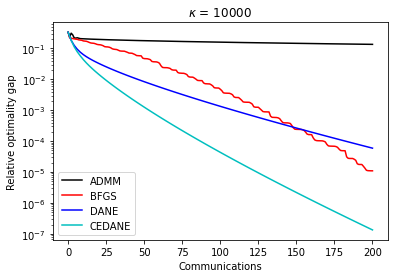

In [7]:
plot(
    res,
    kappa,
    max_comm=200
)

# Logisitic Regression with Gisette datatset

## Kappa = 100

In [8]:
kappa = 100
n_agent = 20
n_iters = 100

mu_BFGS =1.2
mu_DANE =0.005
mu_CEDANE = 0.01
    
p = LogisticRegression(n_agent=n_agent, kappa=kappa, graph_type='er', graph_params=0.5, dataset='gisette', normalize_data=True)
x_0 = np.random.randn(p.dim, n_agent).mean(axis=1)

exps = [
    BFGS(p, n_iters=100, mu=mu_BFGS, x_0=x_0, var_eps=1e-10),
    DANE(p, n_iters=50, local_n_iters=100, mu=mu_DANE, x_0=x_0, var_eps=1e-10),
    CEDANE(p, n_iters=30, local_n_iters=100, mu=mu_CEDANE, x_0=x_0, var_eps=1e-10),
]

res = run_exp(exps, kappa=kappa, max_iter=n_iters, n_gpus=1, processes_per_gpu=4, plot=False, save=False)

INFO 19:25:27.4191 5691 dataset.py:32] Loading Gisette dataset from cached file
INFO 19:25:28.3397 5691 logistic_regression.py:63] Initializing using GPU
INFO 19:25:28.9410 6623 logistic_regression.py:86] Computing norm
INFO 19:25:31.1847 6623 logistic_regression.py:92] Computing min
INFO 19:25:31.5517 6623 logistic_regression.py:94] NAG ran for 237 iterations
INFO 19:25:31.5567 6623 logistic_regression.py:96] f_min = 0.2910012422100766
INFO 19:25:31.5580 6623 logistic_regression.py:97] grad_f(x_min) = 9.275749056325393e-11
INFO 19:25:31.8063 5691 logistic_regression.py:79] Initialization done
INFO 19:25:31.8934 6639 utils.py:21] BFGS started
INFO 19:25:31.9001 6642 utils.py:21] DANE started
INFO 19:25:31.9073 6645 utils.py:21] CEDANE started
INFO 19:25:34.8319 6639 optimizer.py:201] Gradient norm converged
INFO 19:25:34.8359 6639 utils.py:40] BFGS done, total 2.94s
INFO 19:25:49.4013 6642 optimizer.py:201] Gradient norm converged
INFO 19:25:49.4038 6642 utils.py:40] DANE done, total 1

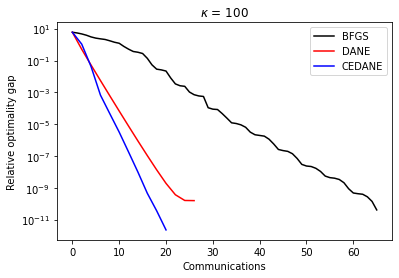

In [9]:
plot(res, kappa, max_comm=200)

## Kappa = 10000

In [10]:
kappa = 10000
n_agent = 20
n_iters = 100

mu_BFGS =1.2
mu_DANE =0.003
mu_CEDANE = 0.01       

    
p = LogisticRegression(n_agent=n_agent, kappa=kappa, graph_type='er', graph_params=0.5, dataset='gisette', normalize_data=True)
x_0 = np.random.randn(p.dim, n_agent).mean(axis=1)

exps = [
    BFGS(p, n_iters=2*n_iters, mu=mu_BFGS, x_0=x_0, var_eps=1e-10),
    DANE(p, n_iters=n_iters, local_n_iters=100, mu=mu_DANE, x_0=x_0, var_eps=1e-10),
    CEDANE(p, n_iters=n_iters, local_n_iters=100, mu=mu_CEDANE, x_0=x_0, var_eps=1e-10),
]

res = run_exp(exps, kappa=kappa, max_iter=n_iters, n_gpus=1, processes_per_gpu=4, plot=False, save=False)

INFO 19:25:57.0752 5691 dataset.py:32] Loading Gisette dataset from cached file
INFO 19:25:57.9394 5691 logistic_regression.py:63] Initializing using GPU
INFO 19:25:58.6141 6801 logistic_regression.py:86] Computing norm
INFO 19:26:00.8411 6801 logistic_regression.py:92] Computing min
INFO 19:26:02.6304 6801 logistic_regression.py:94] NAG ran for 2072 iterations
INFO 19:26:02.6368 6801 logistic_regression.py:96] f_min = 0.04657673651652754
INFO 19:26:02.6382 6801 logistic_regression.py:97] grad_f(x_min) = 9.386237993194705e-11
INFO 19:26:02.8840 5691 logistic_regression.py:79] Initialization done
INFO 19:26:02.9743 6819 utils.py:21] BFGS started
INFO 19:26:02.9823 6822 utils.py:21] DANE started
INFO 19:26:02.9909 6825 utils.py:21] CEDANE started
INFO 19:26:08.8643 6819 utils.py:40] BFGS done, total 5.89s
INFO 19:29:53.6557 6822 utils.py:40] DANE done, total 230.67s
INFO 19:29:57.6014 6825 utils.py:40] CEDANE done, total 234.61s


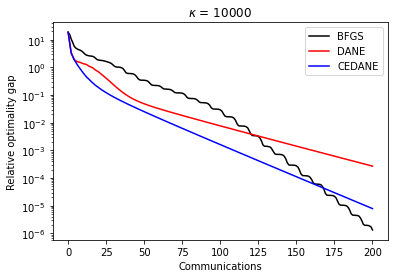

In [11]:
plot(res, kappa, max_comm=200)

# Varing number of agents

In [12]:
from nda import log
log.set_level('WARN')

In [13]:
kappa = 100

n_iters = 1000
n_rounds = 5

n_agents = [20, 30, 40, 50, 60]
results = {_: [[], [], []] for _ in n_agents}
eps = 1e-7

for n_agent in n_agents: 
    log.warn(f"n_agent = {n_agent}") 

    if n_agent == 20:   
        mu_BFGS =1.2
        mu_DANE =0.005
        mu_CEDANE = 0.01

    elif n_agent == 30:
        mu_BFGS =1.2
        mu_DANE =0.005
        mu_CEDANE = 0.01
        
    elif n_agent == 40:
        mu_BFGS =1.2
        mu_DANE =0.005
        mu_CEDANE = 0.01
        
    elif n_agent == 50:
        mu_BFGS =1.2
        mu_DANE =0.01
        mu_CEDANE = 0.02
        
    else:
        mu_BFGS =1.2
        mu_DANE =0.01
        mu_CEDANE = 0.02      

    for _ in range(n_rounds):
        p = LogisticRegression(n_agent=n_agent, kappa=kappa, graph_type='er', graph_params=0.5, dataset='gisette',normalize_data=True)
        x_0 = np.random.randn(p.dim, n_agent).mean(axis=1)
        exps = [
            BFGS(p, n_iters=2*n_iters, mu=mu_BFGS, x_0=x_0, grad_eps=None, var_eps=1e-10, f_eps=eps),
            DANE(p, n_iters=n_iters,local_n_iters=100, mu=mu_DANE, x_0=x_0, grad_eps=None, var_eps=1e-10, f_eps=eps),
            CEDANE(p, n_iters=n_iters,local_n_iters=100, mu=mu_CEDANE, x_0=x_0, grad_eps=None, var_eps=1e-10, f_eps=eps),
        ]

        res = run_exp(exps, kappa=kappa, max_iter=n_iters, n_gpus=1, processes_per_gpu=4, plot=False, save=False)

        for i in range(3):
            f = res[i][1].f
            f = f / p.f_min - 1
            mask = f <= 1e-7
            if mask.sum() > 0:
                results[n_agent][i].append(res[i][1].loc[mask].comm_rounds.values[0])
            else:
                results[n_agent][i].append(n_iters)

WARNING 19:29:58.4836 5691 3859164290.py:11] n_agent = 20
WARNING 19:31:52.2419 5691 3859164290.py:11] n_agent = 30
WARNING 19:34:44.8803 5691 3859164290.py:11] n_agent = 40
WARNING 19:39:36.2515 5691 3859164290.py:11] n_agent = 50
WARNING 19:44:22.2370 5691 3859164290.py:11] n_agent = 60


In [14]:
with open('num_agents.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [15]:
results

{20: [[48.0, 49.0, 43.0, 50.0, 48.0],
  [16.0, 16.0, 16.0, 16.0, 16.0],
  [14.0, 14.0, 14.0, 14.0, 14.0]],
 30: [[51.0, 50.0, 51.0, 51.0, 47.0],
  [26.0, 26.0, 28.0, 26.0, 24.0],
  [16.0, 14.0, 18.0, 16.0, 16.0]],
 40: [[47.0, 45.0, 49.0, 50.0, 47.0],
  [46.0, 34.0, 44.0, 34.0, 46.0],
  [24.0, 24.0, 20.0, 18.0, 24.0]],
 50: [[49.0, 47.0, 48.0, 48.0, 48.0],
  [32.0, 30.0, 36.0, 26.0, 26.0],
  [18.0, 18.0, 18.0, 18.0, 18.0]],
 60: [[49.0, 50.0, 50.0, 49.0, 50.0],
  [62.0, 66.0, 64.0, 72.0, 58.0],
  [18.0, 18.0, 18.0, 18.0, 24.0]]}

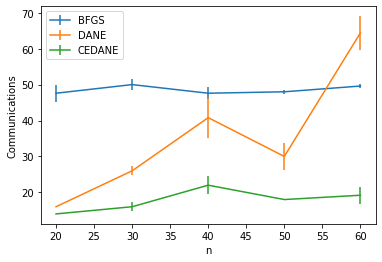

In [16]:
plt.figure()

for i in range(3):
    tmp = []
    for v in results.values():
        stdev = np.std(v[i])
        mean = np.mean(v[i])
        tmp.append([np.mean(v[i]), np.std(v[i])])
    tmp = np.array(tmp)
    plt.errorbar(n_agents, tmp[:, 0], yerr=tmp[:, 1])

plt.legend(['BFGS', 'DANE', 'CEDANE'])
plt.xlabel('n')
plt.ylabel('Communications')
plt.show()

# Varing kappa

In [17]:
n_agent = 20

n_rounds = 5
n_iters = 1000

eps = 1e-7

kappas = [10, 100, 1000, 10000]
results = {_: [[], [], []] for _ in kappas}

for kappa in kappas:
    log.warn(f"kappa = {kappa}") 

    if kappa == 10:
    
        mu_BFGS =1
        mu_DANE =1E-5
        mu_CEDANE = 1E-2
    elif kappa == 100:

        mu_BFGS =1.2
        mu_DANE =0.005
        mu_CEDANE =0.01
    elif kappa == 1000:

        mu_BFGS =1.2
        mu_DANE =0.005
        mu_CEDANE =0.01
    else:

        mu_BFGS =1.2
        mu_DANE =0.003
        mu_CEDANE = 0.01       

    for _ in range(n_rounds):
        log.warn(f"Round {_}")

        p = LogisticRegression(n_agent=n_agent, kappa=kappa, graph_type='er', graph_params=0.5, dataset='gisette',normalize_data=True)
        x_0 = np.random.randn(p.dim, n_agent).mean(axis=1)        
        
        exps = [
            BFGS(p, n_iters=2*n_iters, mu=mu_BFGS, x_0=x_0, grad_eps=None, var_eps=1e-9, f_eps=eps),
            DANE(p, n_iters=n_iters, local_n_iters=100, mu=mu_DANE, x_0=x_0, grad_eps=None, var_eps=1e-9, f_eps=eps),
            CEDANE(p, n_iters=n_iters, local_n_iters=100, mu=mu_CEDANE, x_0=x_0, grad_eps=None, var_eps=1e-9, f_eps=eps),
        ]
    
        res = run_exp(exps, kappa=kappa, max_iter=n_iters, n_gpus=1, processes_per_gpu=4, plot=False, save=False)
        
        for i in range(3):
            f = res[i][1].f
            f = f / p.f_min - 1
            mask = f <= 1e-7
            if mask.sum() > 0:
                results[kappa][i].append(res[i][1].loc[mask].comm_rounds.values[0])
            else:
                results[kappa][i].append(n_iters)

WARNING 19:51:48.6378 5691 3613059648.py:12] kappa = 10
WARNING 19:51:48.6387 5691 3613059648.py:36] Round 0
WARNING 19:51:58.7630 5691 3613059648.py:36] Round 1
WARNING 19:52:08.7485 5691 3613059648.py:36] Round 2
WARNING 19:52:18.7319 5691 3613059648.py:36] Round 3
WARNING 19:52:28.8707 5691 3613059648.py:36] Round 4
WARNING 19:52:39.0800 5691 3613059648.py:12] kappa = 100
WARNING 19:52:39.0809 5691 3613059648.py:36] Round 0
WARNING 19:53:01.8712 5691 3613059648.py:36] Round 1
WARNING 19:53:24.6715 5691 3613059648.py:36] Round 2
WARNING 19:53:47.3584 5691 3613059648.py:36] Round 3
WARNING 19:54:10.2023 5691 3613059648.py:36] Round 4
WARNING 19:54:32.9005 5691 3613059648.py:12] kappa = 1000
WARNING 19:54:32.9015 5691 3613059648.py:36] Round 0
WARNING 19:55:37.3181 5691 3613059648.py:36] Round 1
WARNING 19:56:42.1562 5691 3613059648.py:36] Round 2
WARNING 19:57:46.2703 5691 3613059648.py:36] Round 3
WARNING 19:58:50.9344 5691 3613059648.py:36] Round 4
WARNING 19:59:55.5570 5691 3613059

In [18]:
with open('kappa.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [19]:
results

{10: [[17.0, 16.0, 16.0, 16.0, 15.0],
  [6.0, 6.0, 6.0, 6.0, 6.0],
  [6.0, 6.0, 6.0, 6.0, 6.0]],
 100: [[50.0, 52.0, 48.0, 51.0, 49.0],
  [16.0, 16.0, 16.0, 16.0, 16.0],
  [14.0, 14.0, 14.0, 14.0, 14.0]],
 1000: [[116.0, 120.0, 119.0, 114.0, 115.0],
  [88.0, 88.0, 88.0, 88.0, 88.0],
  [40.0, 40.0, 40.0, 40.0, 40.0]],
 10000: [[222.0, 226.0, 233.0, 223.0, 227.0],
  [1000, 1000, 1000, 1000, 1000],
  [284.0, 286.0, 284.0, 284.0, 286.0]]}

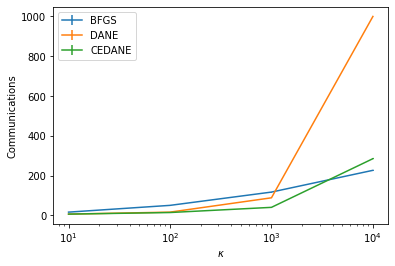

In [21]:
plt.figure()

for i in range(3):
    tmp = []
    for v in results.values():
        stdev = np.std(v[i])
        mean = np.mean(v[i])
        tmp.append([np.mean(v[i]), np.std(v[i])])
    tmp = np.array(tmp)
    plt.errorbar(kappas, tmp[:, 0], yerr=tmp[:, 1])

plt.xscale('log')
plt.legend(['BFGS', 'DANE', 'CEDANE'])
plt.xlabel(r'$\kappa$')
plt.ylabel('Communications')
plt.show()